# Requires enabling GPU in Colab

In [1]:
### If save data:
save_data = False

if save_data:
  def ensure_dir(file_path):
    import os
    directory = os.path.dirname(file_path)
    if not os.path.exists(directory):
        os.makedirs(directory)

  from google.colab import drive
  drive.mount('/content/drive')
  %cd drive/My Drive/
  save_dir = "data/"
  ensure_dir(save_dir)

In [2]:
!pip install cupy-cuda100
import cupy as cp
import numpy as np
import matplotlib.pyplot as plt

!pip install -q git+https://github.com/Pehlevan-Group/kernel-generalization
from kernel_generalization import kernel_simulation as ker_sim
from kernel_generalization import kernel_spectrum as ker_spec
from kernel_generalization import kernel_regression as ker_reg
from kernel_generalization.utils import gegenbauer

from datetime import datetime
import os

     |████████████████████████████████| 369.7MB 39kB/s 


In [7]:
def plot_exp_shift(P_vals, All_errs, std_errs, all_mc, std_MC, sol, errs_tot, alpha, shift, n_idx):
    
    All_errs = All_errs[:,:,:,n_idx]
    std_errs = std_errs[:,:,:,n_idx]
    all_mc = all_mc[:,:,n_idx]
    std_MC = std_MC[:,:,n_idx]
    
    sol = sol[:,:,:,n_idx]
    errs_tot = errs_tot[:,:,n_idx]
    alpha = alpha[n_idx]
    
    plt.rcParams.update({'font.size': 12})
    fig, axs = plt.subplots(1, 2)
    fig.set_size_inches(7, 4)
    
    kplot = [1, 2, 3,4]
    colors = ['b', 'g', 'r', 'c', 'm', 'y', 'k']
    scale = [1e+9**i for i in range(len(kplot))]
    
    for i in range(len(kplot)):
        for j in range(len(shift)):
            error_exp = All_errs[j, :, kplot[i]]/All_errs[j, 0, kplot[i]]/scale[i]
            std_exp = std_errs[j, :, kplot[i]]/All_errs[j, 0, kplot[i]]/scale[i]
            if j == 0:
                axs[0].errorbar(P_vals, error_exp, std_exp, fmt = 'o' , color=colors[i], label='k=%d' % kplot[i])
            else:
                axs[0].errorbar(P_vals, error_exp, std_exp, fmt = 'o' , color=colors[i])
            
            error_theory = sol[j, :, kplot[i]]/sol[j, 0, kplot[i]]/scale[i]
            axs[0].plot(P_vals, error_theory, '--', color=colors[i])
            axs[0].set_xscale('log')
            axs[0].set_yscale('log')
            axs[0].set_xlabel(r'P')
            axs[0].set_ylabel(r'$E_k$')
            axs[0].legend()
    
    for j in range(len(shift)):
        error_exp = all_mc[j,:]
        std_exp = std_MC[j,:]
        alpha_s = alpha+shift[j]
        axs[1].errorbar(P_vals, error_exp, std_exp, fmt = 'o', color=colors[j],label='$\\alpha^*$=%f' % alpha_s)
        
        error_theory = errs_tot[j,:]
        axs[1].plot(P_vals, error_theory, '--', color=colors[j])
        axs[1].set_xscale('log')
        axs[1].set_yscale('log')
        axs[1].set_xlabel(r'P')
        axs[1].set_ylabel(r'$E_g$')
        axs[1].legend()
    
    plt.subplots_adjust(bottom=0.02, right=0.8, top=0.7, left=-0.25)
    fig.set_figheight(7)
    fig.set_figwidth(12)
    fig.set
    plt.xlim([np.amin(P_vals) + 5, np.amax(P_vals)])
    if save_data: plt.savefig(save_dir +"Figs/"+ 'error_curve_'+str(n_idx)+'.pdf', bbox_inches = 'tight')
    plt.show()

## Alpha is defined to be lambda + 1
def noise_s(alpha):
    trig_left = (-np.cos(np.arctan(8*np.sqrt(alpha)/(-1+9*alpha*(2+3*alpha)))/3+np.pi/3)+np.sqrt(3)*np.sin(np.arctan(8*np.sqrt(alpha)/(-1+9*alpha*(2+3*alpha)))/3+np.pi/3))
    trig_right = (-np.cos(np.arctan(8*np.sqrt(alpha)/(-1+9*alpha*(2+3*alpha)))/3)+np.sqrt(3)*np.sin(np.arctan(8*np.sqrt(alpha)/(-1+9*alpha*(2+3*alpha)))/3))
    return 3*alpha*(3*alpha + 2) + 3*(alpha*np.sqrt(1+alpha)*np.sqrt(1+9*alpha))*(trig_left*(alpha<(np.sqrt(12)-np.sqrt(9))/9)+trig_right*(alpha>=(np.sqrt(12)-np.sqrt(9))/9))

def Noise(spectrum, lambda_bar, lamb, cut, shift):
    kmax = len(spectrum)
    alpha_s = lamb+np.array([np.sum(lambda_bar[i+1:])/lambda_bar[i+1] for i in range(kmax-2)])
    
    noise = np.zeros((len(shift),cut))
    for i in range(cut):
        for j in range(len(shift)):
            if alpha_s[i] >= 2:
                alpha = (alpha_s[i]-1)*(1+shift[j])
                noise[j,i] = spectrum[i+1]**2*(2*alpha+1)*degens[i+1]
            else:
                alpha = (alpha_s[i]-1)*(1+shift[j])
                noise[j,i] = spectrum[i+1]**2*noise_s(alpha)*degens[i+1]
                
    return noise, alpha_s



 P = 1.00 | noise = 0.00 | Repeat 10/10 | error: 0.000
 P = 1.00 | noise = 0.00 | Repeat 10/10 | error: 0.000
 P = 1.00 | noise = 0.00 | Repeat 10/10 | error: 0.000
 P = 1.00 | noise = 0.01 | Repeat 10/10 | error: 0.000

 P = 2.00 | noise = 0.00 | Repeat 10/10 | error: 0.000
 P = 2.00 | noise = 0.00 | Repeat 10/10 | error: 0.000
 P = 2.00 | noise = 0.00 | Repeat 10/10 | error: 0.000
 P = 2.00 | noise = 0.01 | Repeat 10/10 | error: 0.000

 P = 3.00 | noise = 0.00 | Repeat 10/10 | error: 0.000
 P = 3.00 | noise = 0.00 | Repeat 10/10 | error: 0.000
 P = 3.00 | noise = 0.00 | Repeat 10/10 | error: 0.000
 P = 3.00 | noise = 0.01 | Repeat 10/10 | error: 0.000

 P = 5.00 | noise = 0.00 | Repeat 10/10 | error: 0.000
 P = 5.00 | noise = 0.00 | Repeat 10/10 | error: 0.000
 P = 5.00 | noise = 0.00 | Repeat 10/10 | error: 0.000
 P = 5.00 | noise = 0.01 | Repeat 10/10 | error: 0.000

 P = 7.00 | noise = 0.00 | Repeat 10/10 | error: 0.000
 P = 7.00 | noise = 0.00 | Repeat 10/10 | error: 0.000
 P = 

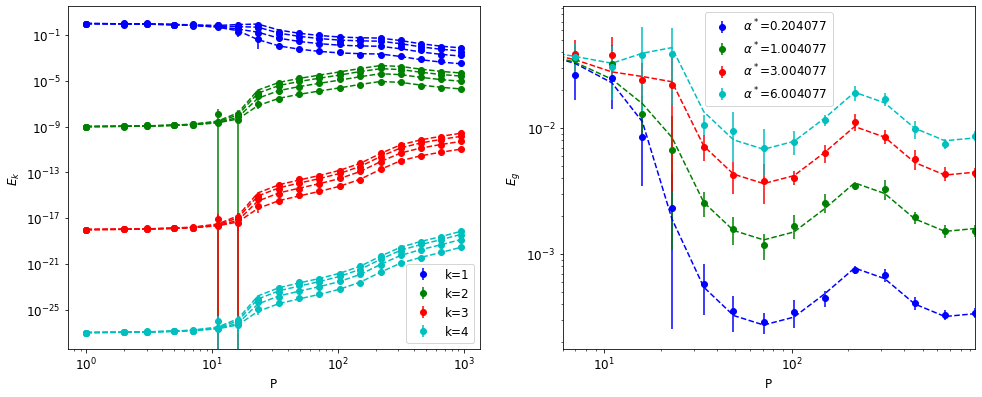

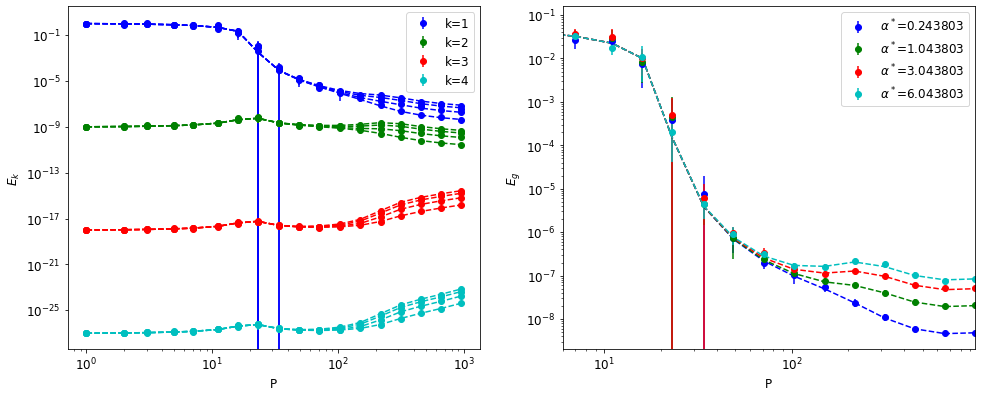

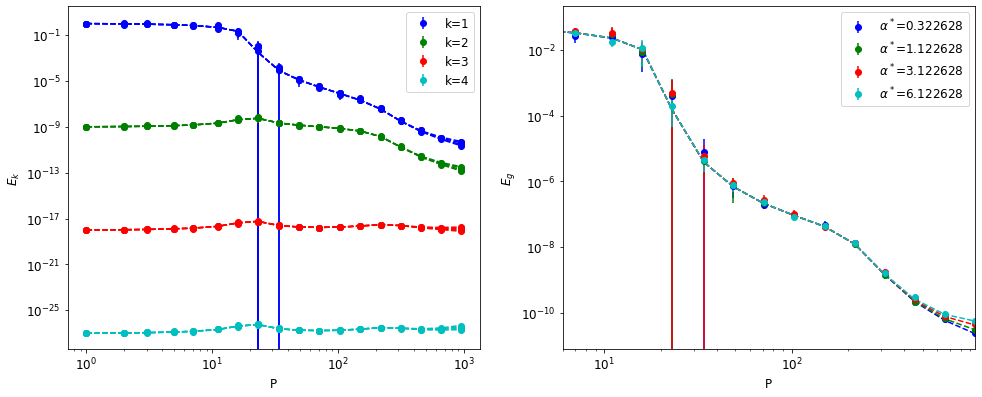

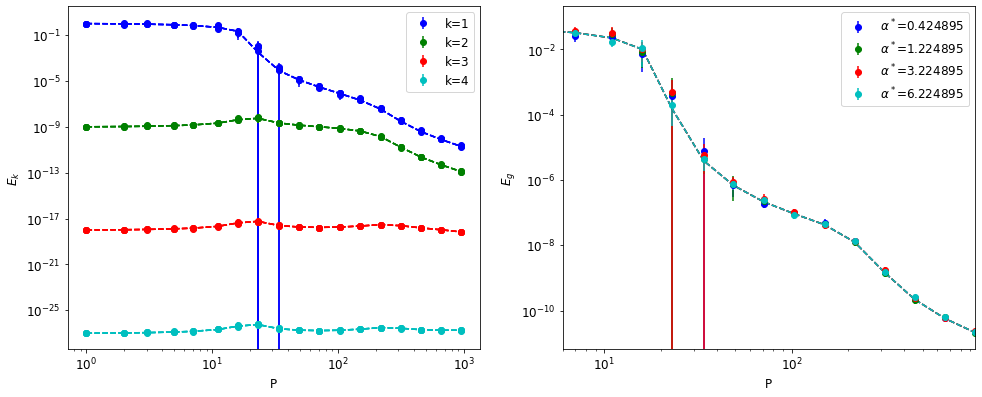


 P = 1995.00 | noise = 0.00 | Repeat 10/10 | error: 0.000
 P = 1995.00 | noise = 0.00 | Repeat 10/10 | error: 0.000
 P = 1995.00 | noise = 0.00 | Repeat 10/10 | error: 0.000
 P = 1995.00 | noise = 0.01 | Repeat 10/10 | error: 0.000


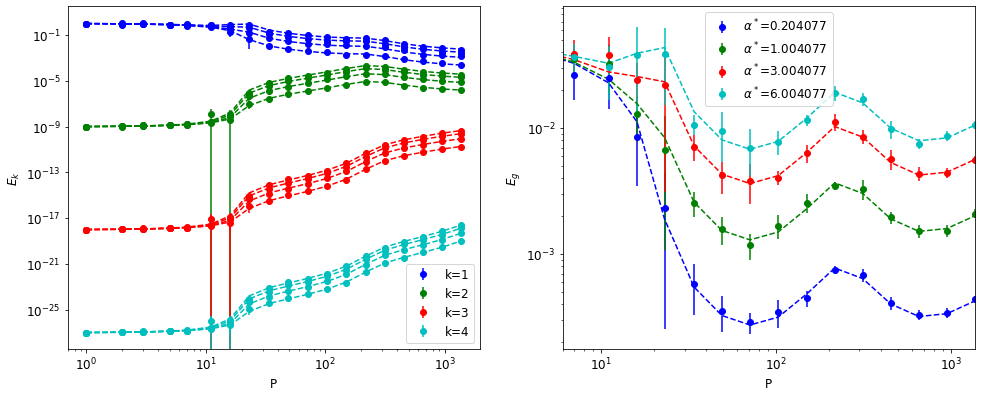

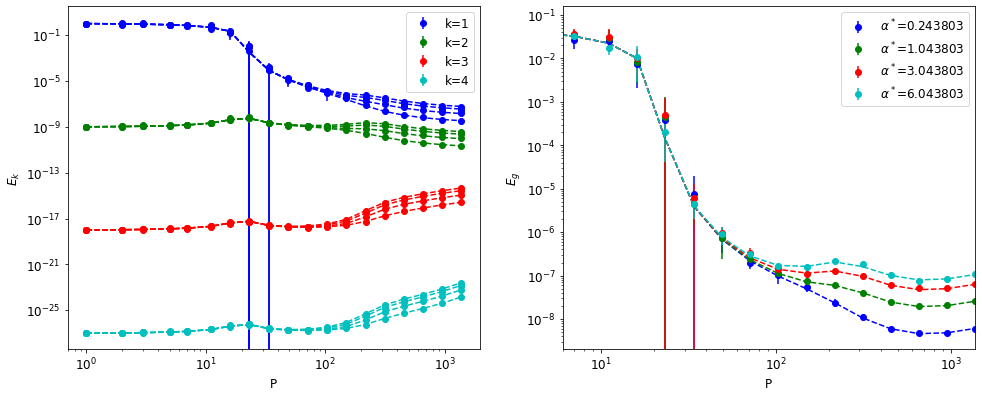

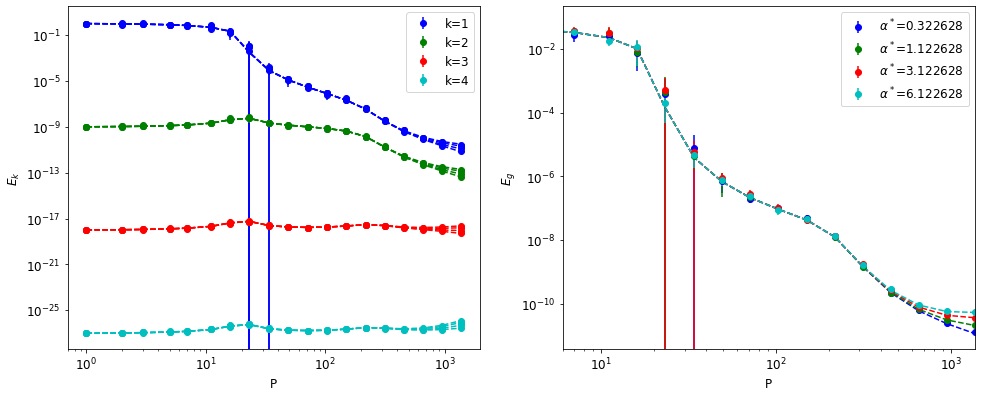

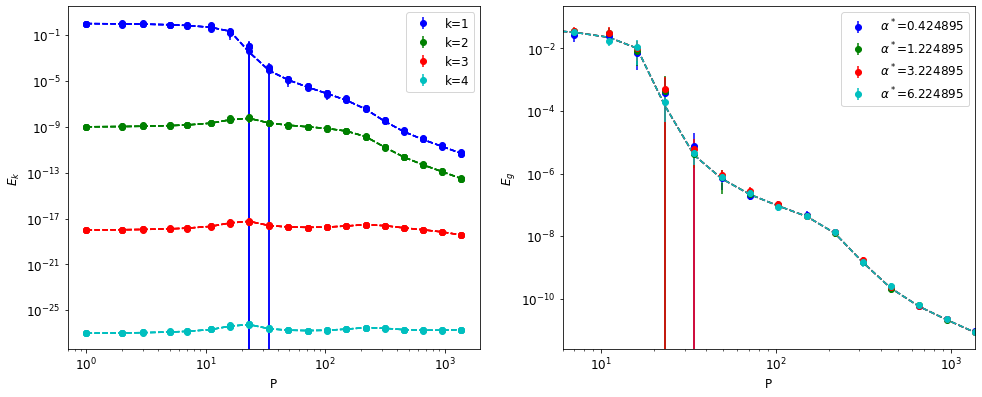

In [8]:
# For larger P_vals consider running it on cluster with CPU
# Use ker_reg.generalization_cpu if CPU is used.

# Parameters of the experiment
P_vals = np.logspace(0.25, 3.3, num=20).astype('int') # np.logspace(0.25, 4.1, num=30).astype('int')
dim = 20
kmax = 100
lamb = 0
num_repeats_before_100 = 10
num_repeats_after_100 = 10
P_teach = 50
P_test = 1000

# Obtain the spectrum and degenerecies
s = 8
degens = np.array([gegenbauer.degeneracy_kernel(dim, k) for k in range(kmax)])

spec_type = ['exp','power']
spec = 1

if spec_type[spec] == 'exp':
    spectrum, lambda_bar = ker_spec.exp_spectrum(s, kmax, degens)
    spectrum[0] =1
    lambda_bar[0] = 0
    alpha = np.array([np.sum(lambda_bar[i+1:])/lambda_bar[i+1] for i in range(kmax-2)])
    noise = lambda_bar[1:5]*alpha[0:4]/degens[1:5]
elif spec_type[spec] == 'power':
    spectrum, lambda_bar = ker_spec.power_spectrum(s, kmax, degens)
    spectrum[0] = 0
    lambda_bar[0] = 0
    cut = 4
    shift = np.array([-0.8,0,2,5])
    noise, alpha = Noise(spectrum,lambda_bar,lamb,cut,shift)
  # Calculate theory

ModeErr_theory = np.zeros((len(shift), len(P_vals), kmax, cut))
GenErr_theory = np.zeros((len(shift), len(P_vals), cut))
GenErr_asymp = np.zeros((4, len(shift), len(P_vals), cut))
Cum_gen_errs = np.zeros((len(shift), len(P_vals), kmax, cut))

LargePVals = np.logspace(-7, 14, 200)
GenErr_asymp_largeP = np.zeros((4, len(shift), len(LargePVals), cut))

for i in range(len(shift)):
    ModeErr_theory[i], GenErr_theory[i], Cum_gen_errs[i]= ker_sim.simulate_pure_gen_error(P_vals, spectrum, degens, noise[i], lamb=lamb)
    for j in range(4): 
        GenErr_asymp[j, i] = ker_sim.simulate_asymptotic(P_vals, spectrum, degens, noise[i], lamb=lamb, mode = j + 1)
        GenErr_asymp_largeP[j,i] = ker_sim.simulate_asymptotic(LargePVals, spectrum, degens, noise[i], lamb=lamb, mode = j + 1)
    
# Save initial files

if save_data:
  timestamp = datetime.now().strftime("%m-%d_%H-%M")
  comment = '_synth'
  directory = save_dir + 'dim_'+ str(dim)+ '_' + spec_type[spec]+'_' + str(s) + comment + '/'
  ensure_dir(directory)

  params = {'spectrum': spec_type[spec], 'degens': degens, 'lambda_bar': lambda_bar, 'alpha': alpha, 
              'decay(s)': s, 'dim': dim, 'kmax': kmax, 'noise': noise, 'shift': shift, 'lamb': lamb, 
              'teach_samp': P_teach, 'test_samp': P_test, 
              'num_repeat<100': num_repeats_before_100, 'num_repeat>100': num_repeats_after_100}


  filename_theory = directory + timestamp + '_error_theory.npz'
  np.savez(filename_theory, P_vals, ModeErr_theory, GenErr_theory, GenErr_asymp, Cum_gen_errs, params, LargePVals, GenErr_asymp_largeP)

# Perform the experiment

ModeErr_exp = np.zeros((len(shift), len(P_vals), kmax, cut))
GenErr_exp = np.zeros((len(shift), len(P_vals), cut))
ModeErr_std = np.zeros((len(shift), len(P_vals), kmax, cut))
GenErr_std = np.zeros((len(shift), len(P_vals), cut))

for i in range(len(P_vals)):
    print('\n ####### remaining: ' + str(len(P_vals) - i) + ' #######', end = '\r')
    for j in range(len(shift)):
        P = P_vals[i]
        if P < 100:
            num_repeats = num_repeats_before_100
        else:
            num_repeats = num_repeats_after_100
            
        ModeErr_exp[j,i, :, :], ModeErr_std[j,i, :, :], GenErr_exp[j,i, :], GenErr_std[j,i, :] = ker_reg.generalization_gpu(P,P_teach, P_test,
                                                                                        spectrum, degens,
                                                                                        dim, kmax,
                                                                                        num_repeats,
                                                                                        lamb=lamb,
                                                                                        noise_var=noise[j], calculate_mode_errs = True)
                                                                                        
    ##### Saving data #####
    if P > 1000:
        if save_data:
          timestamp = datetime.now().strftime("%d_%H-%M")
          label = timestamp + '_' + str(P) + '_'
          filename_exp = directory + label + 'error_exp.npz'
          np.savez(filename_exp, ModeErr_exp, GenErr_exp, ModeErr_std, GenErr_std)
        
        for n_idx in range(noise.shape[1]):
            plot_exp_shift(P_vals[:i], ModeErr_exp[:,:i], ModeErr_std[:,:i], GenErr_exp[:,:i], GenErr_std[:,:i], ModeErr_theory[:,:i], GenErr_theory[:,:i], alpha, shift, n_idx)                                                                               


if save_data:
  timestamp = datetime.now().strftime("%d_%H-%M")
  label = timestamp + '_' + str(P_vals[i]) + '_'

  filename_exp = directory + label + 'error_exp.npz'
  np.savez(filename_exp, ModeErr_exp, GenErr_exp, ModeErr_std, GenErr_std)